# **Letter classification study using the K Nearest Neighbors model**

## **Introduction**

This is the main study of a letter classification using the EMNIST letters database avaiable in https://www.nist.gov/itl/products-and-services/emnist-dataset

## **Reading the dataset**

This part contains the functions to read the dataset saved in the ".npy" files to use it in the machine learning algorithm created

In [1]:
import numpy as np

In [2]:
def transform_dataset(dataset):
    labels = []
    letters = []
    for row in dataset:
        labels.append(row[-1])
        letters.append(np.array(row[:-1]))
           
    return labels, letters      

In [3]:
%%time

print("Loading Train dataset...")
train_array = np.load('./../train.npy')
label_train, img_train = transform_dataset(train_array)
print("Finished loading train dataset!")

Loading Train dataset...
Finished loading train dataset!
CPU times: user 489 ms, sys: 501 ms, total: 990 ms
Wall time: 991 ms


In [4]:
%%time

print("Loading Test dataset...")
test_array = np.load('./../test.npy')
label_test, img_test = transform_dataset(test_array)
print("Finished loading test dataset!")

Loading Test dataset...
Finished loading test dataset!
CPU times: user 53 ms, sys: 34 ms, total: 87 ms
Wall time: 84.2 ms


In [5]:
%%time

print("Loading Validation dataset...")
validation_array = np.load('./../validation.npy')
label_validation, img_validation = transform_dataset(validation_array)
print("Finished loading validation dataset!")

Loading Validation dataset...
Finished loading validation dataset!
CPU times: user 52.3 ms, sys: 60.2 ms, total: 112 ms
Wall time: 110 ms


## **K-Nearest Neighbors algorithm created**

This section is presented the algorithme developped.

In [6]:
import knn
from sklearn.metrics import accuracy_score

In [7]:
print("Train dataset has: " + str(len(img_train)) + " letters")
print("Validation dataset has: " + str(len(img_validation)) + " letters")

Train dataset has: 120000 letters
Validation dataset has: 12300 letters


In [8]:
# N = number of letters used in the train dataset
# M = number of letters used in the validation dataset

N = 5000
M = 500
train_x = img_train[:N]
train_y = label_train[:N]
validation_x = img_validation[:M]
validation_y = label_validation[:M]

In [9]:
%%time 

def knn_train(neighbor):
    predicted = knn.k_nearest_neighbors(train_array[:N], train_array[:M], neighbor)
    
    print("The train accuracy is: " + str(round((accuracy_score(train_y[:M], predicted) * 100), 3)) + "%")
    
    return predicted
    
predicted_train = knn_train(5)

The train accuracy is: 82.0%
CPU times: user 19min 7s, sys: 3.08 s, total: 19min 11s
Wall time: 19min 6s


In [10]:
%%time 

def knn_validation():
    predicted = knn.k_nearest_neighbors(train_array[:N], validation_array[:M], 5)

    print("The validation accuracy is: " + str(round((accuracy_score(validation_y[:M], predicted) * 100), 3)) + "%")
    return predicted

predicted_validation = knn_validation()

The validation accuracy is: 74.6%
CPU times: user 19min 18s, sys: 2.67 s, total: 19min 21s
Wall time: 19min 17s


## **Visualizing the study**

This part consist a better visualization of the study done to better analyse the classifier

In [11]:
import matplotlib.pyplot as plt 
import itertools
from sklearn.metrics import confusion_matrix
import string

In [20]:
def plot_confusion_matrix(data_x, data_y, Ypred):
    classes = string.ascii_uppercase
    
    # Computation of confusion matrix on testing set
    cm = confusion_matrix(data_y, Ypred)
    
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    #plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

The train accuracy is: 82.0%


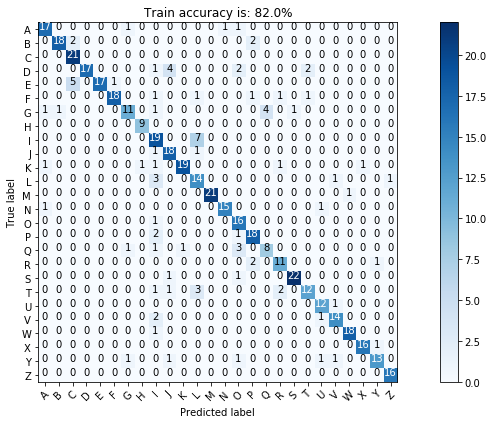

In [27]:
#Plot confusion matrix for analyse the classification
plt.figure(figsize=(12,6))
#plt.subplot(121)
plt.title("Train accuracy is: " + str(round((accuracy_score(train_y[:M], predicted_train) * 100), 3)) + "%")
plot_confusion_matrix(train_x[:M], train_y[:M], predicted_train)
print("The train accuracy is: " + str(round((accuracy_score(train_y[:M], predicted_train) * 100), 3)) + "%")
plt.savefig("./Results/Train")



The validation accuracy is: 74.6%


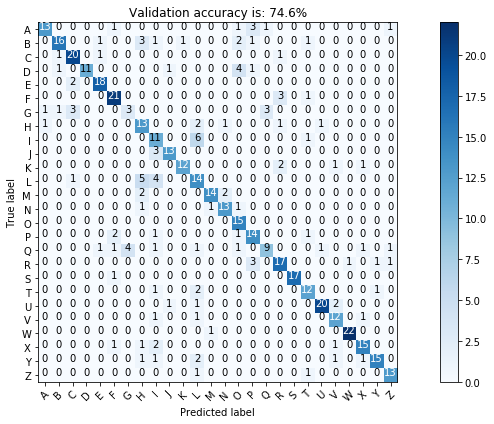

In [28]:
plt.figure(figsize=(12,6))
#plt.subplot(122)
plt.title("Validation accuracy is: " + str(round((accuracy_score(validation_y[:M], predicted_validation) * 100), 3)) + "%")
plot_confusion_matrix(validation_x, validation_y, predicted_validation)
print("The validation accuracy is: " + str(round((accuracy_score(validation_y[:M], predicted_validation) * 100), 3)) + "%")
plt.savefig("./Results/Validation")
#plt.show()

## Hyperparameters study

This part consist on making a study of the hyperparameters of the KNN model

In [57]:
# Model training and accuracy computation for different k values

def tuning_parameter_new_knn(start_value, end_value, N):
    values = [i for i in range(start_value, end_value)]
    accs_train = []
    accs_validation  = []

    for neighbors in values:

        prediction_train = []
        prediction_validation = []

        prediction_train = knn.k_nearest_neighbors(train_array[:N], train_array[:M], neighbors)
        accs_train.append(accuracy_score(train_y[:M], prediction_train))

        prediction_validation = knn.k_nearest_neighbors(train_array[:N], train_array[:M], neighbors)
        accs_validation.append(accuracy_score(validation_y, prediction_validation))

    plt.figure(figsize=(16, 8))

    print("Optimal number for k: " + str(values[np.argmax(accs_validation)]))

    # Draw accuracies as a function of the depth for both trainin and testing sets
    plt.plot(values, accs_train, label = 'Train Accuracy')
    plt.plot(values, accs_validation,  label = 'Validation Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Number of k neighbors')
    plt.legend()
    plt.xticks(values)
    plt.show()  

Optimal number for k: 3


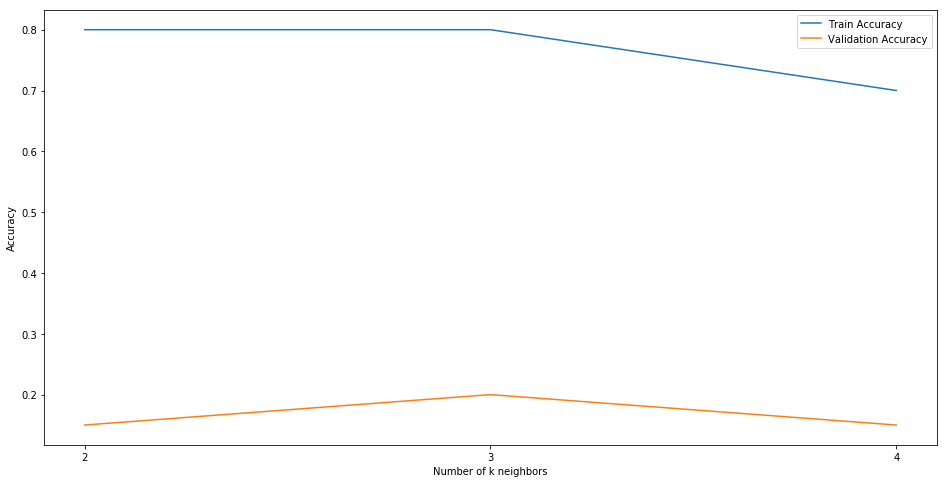

CPU times: user 1min 50s, sys: 619 ms, total: 1min 51s
Wall time: 1min 50s


In [58]:
%%time 

tuning_parameter_new_knn(2, 15, 2000)

## **Best K-Nearest Neighbors model**

Finally after making the study of the hyperparameters we make another study to see the gain in performance

In [70]:
neighbor = 3

In [71]:
%%time 

best_predicted_train = knn_train(neighbor)

The train accuracy is: 80.0%
CPU times: user 15.6 s, sys: 43.6 ms, total: 15.7 s
Wall time: 15.6 s


In [79]:
print("Test dataset has: " + str(len(img_test)) + " letters")

Test dataset has: 4100 letters


In [80]:
W = 20
test_x = img_test[:W]
test_y = label_test[:W]

In [73]:
def knn_test(N, n_neighbors):  
    #Predict the results of the train dataset
    predicted = knn.k_nearest_neighbors(train_array[:N], test_array[:W], n_neighbors)

    print("The test accuracy is: " + str(accuracy_score(test_y[:W], predicted)))
    
    return predicted

In [74]:
%%time 

predicted_test = knn_test(2000, neighbor)

The test accuracy is: 0.5
CPU times: user 18.9 s, sys: 51.5 ms, total: 19 s
Wall time: 18.9 s


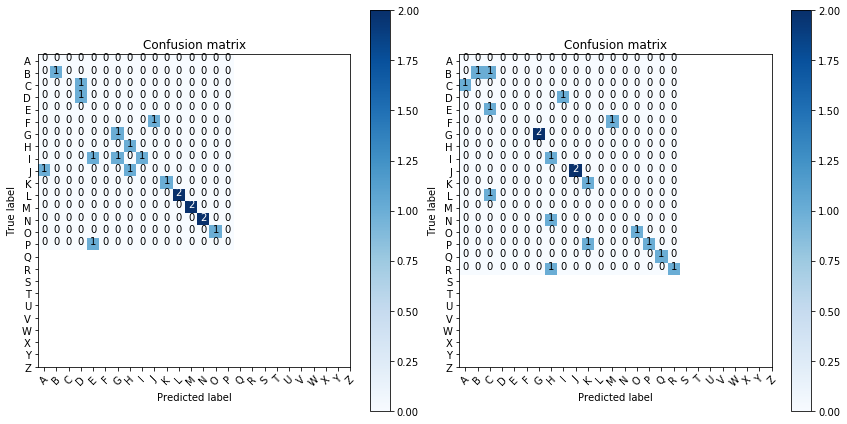

In [75]:
#Plot confusion matrix for analyse the classification
plt.figure(figsize=(12,6))
plt.subplot(121)
plot_confusion_matrix(train_x[:M], train_y[:M], predicted_train)

plt.subplot(122)
plot_confusion_matrix(test_x, test_y, predicted_test)
plt.show()